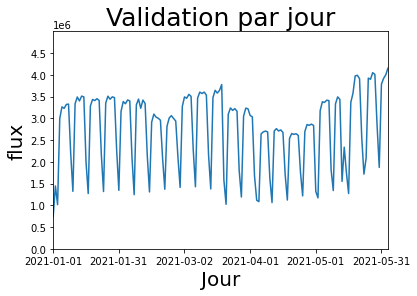

In [29]:
import pyspark
import csv
import sys  
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType,StructField, StringType, IntegerType
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import numpy as np

spark = SparkSession.builder.appName("Python").getOrCreate()

#spark = SparkSession.builder.master("put hdfs adress here").appName("Python").getOrCreate()



df = spark.read.format("csv").option("header", True).option("delimiter",";").load('validations_1er_semestre_2021.csv')


df2 = df.select(col("JOUR"),col("LIBELLE_ARRET"),col("CATEGORIE_TITRE"),col("NB_VALD").astype(IntegerType()))
#df2.printSchema()

#df2.groupBy("JOUR","LIBELLE_ARRET").sum("NB_VALD").show(10,vertical=True)
df3 = df2.groupBy("JOUR").sum("NB_VALD").orderBy("JOUR") #.show(10,vertical=True)
#df3.show()


mach = df3.select(col('JOUR'), col('sum(NB_VALD)')).rdd.map(lambda x: (x[0], x[1])).collect()

#print(mach)

#plt.scatter(*zip(*mach))
#plt.show()
plt.plot(*zip(*mach))
plt.title('Validation par jour', fontsize=25)
plt.xlabel('Jour', fontsize=20)
plt.ylabel('flux', fontsize=20)
plt.xlim([0,153])
plt.ylim([0,5000000])
plt.xticks(np.arange(0, 153, 30))
plt.yticks(np.arange(0, 5000000, 500000))

plt.show()
